<a href="https://colab.research.google.com/github/shreyaahadkar/data-visualization/blob/main/Black_Friday_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Reading the CSV File

In [11]:
df = pd.read_csv('BlackFriday.csv')

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


## Handling the NULL Values

In [13]:
df.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             78672
Product_Category_3            176204
Purchase                           1
dtype: int64

In [14]:
del df['Product_Category_2']
del df['Product_Category_3']

In [15]:
df.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Purchase                      1
dtype: int64

## New Data

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


## Analysing Columns

In [17]:
df['User_ID'].nunique()

5892

In [18]:
df['Product_ID'].nunique()

3503

In [19]:
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [20]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [21]:
df['Occupation'].unique()

array([10., 16., 15.,  7., 20.,  9.,  1., 12., 17.,  0.,  3.,  4., 11.,
        8., 19.,  2., 18.,  5., 14., 13.,  6., nan])

In [22]:
df['City_Category'].unique()

array(['A', 'C', 'B', nan], dtype=object)

In [23]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [24]:
df['Marital_Status'].unique()

array([ 0.,  1., nan])

In [25]:
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [26]:
df['Purchase'].sum()

2365612795.0

### Summary

In [27]:
for column in df.columns:
    print(column,':',df[column].nunique())

User_ID : 5892
Product_ID : 3503
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 16380


## Analysing Gender

In [28]:
df['Gender'].value_counts()

Gender
M    191383
F     62548
Name: count, dtype: int64

<Axes: title={'center': 'Gender Ratio'}, ylabel='count'>

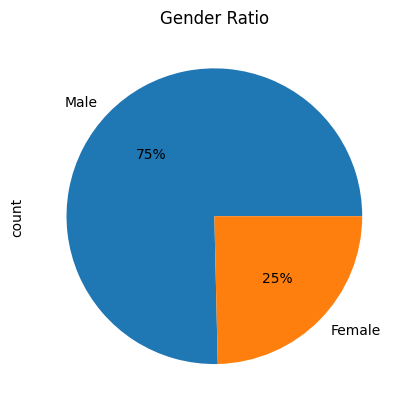

In [29]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.f%%', labels=['Male','Female'], title='Gender Ratio')

<Axes: title={'center': 'Gender Wise Purchase'}, ylabel='Purchase'>

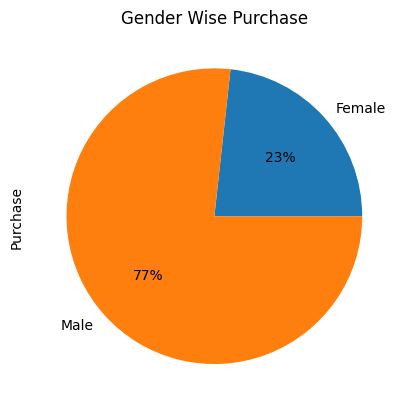

In [30]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie', labels=['Female','Male'], autopct='%1.f%%', title='Gender Wise Purchase')

## Analysing Age & Marital Status

<Axes: xlabel='Age'>

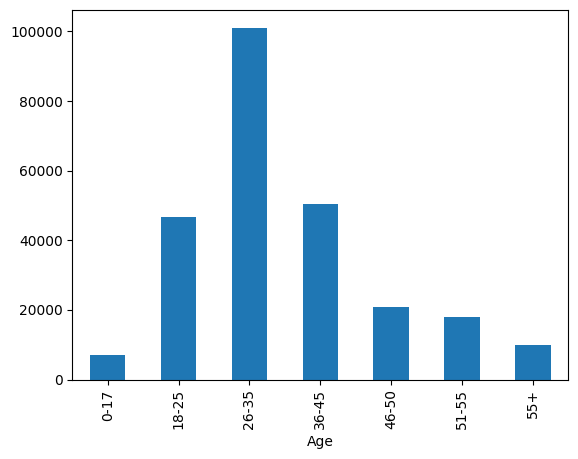

In [33]:
df.groupby('Age').size().plot(kind='bar')

In [34]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

In [35]:
lst

[['0-17', 1854],
 ['55+', 2115],
 ['26-35', 3269],
 ['46-50', 2766],
 ['51-55', 2508],
 ['36-45', 3079],
 ['18-25', 2895],
 [nan, 0]]

In [36]:
df2 = pd.DataFrame(lst, columns=['Age Group','Unique Purchase'])

In [37]:
df2

,Age Group,Unique Purchase
0,0-17,1854
1,55+,2115
2,26-35,3269
3,46-50,2766
4,51-55,2508
5,36-45,3079
6,18-25,2895
7,NaN,0


<Axes: xlabel='Age Group', ylabel='Unique Purchase'>

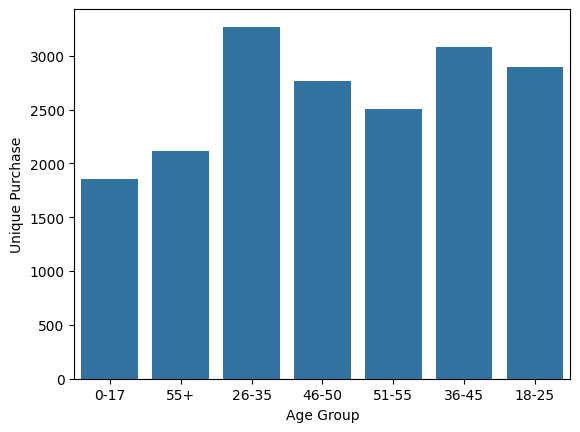

In [38]:
sns.barplot(x='Age Group', y='Unique Purchase', data=df2)

<Axes: title={'center': 'Amount Spent by each Age Group'}, xlabel='Age'>

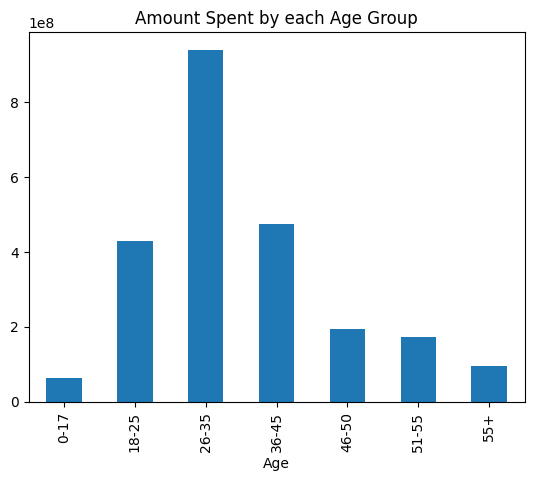

In [39]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', title='Amount Spent by each Age Group')

<Axes: xlabel='Marital_Status'>

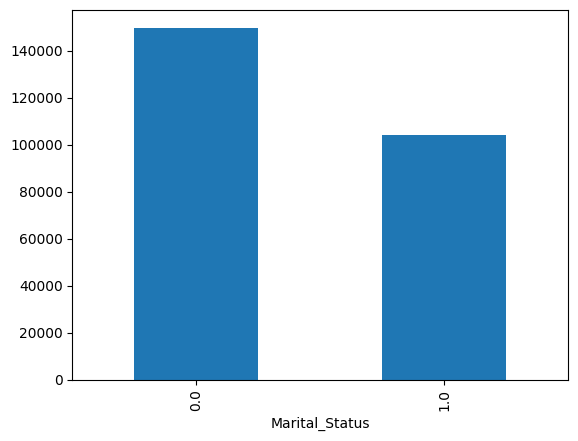

In [41]:
df['Marital_Status'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

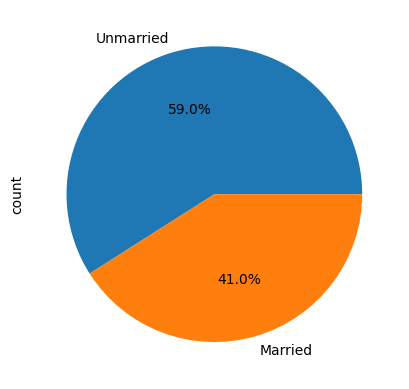

In [42]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%0.1f%%',labels=['Unmarried','Married'])

## Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

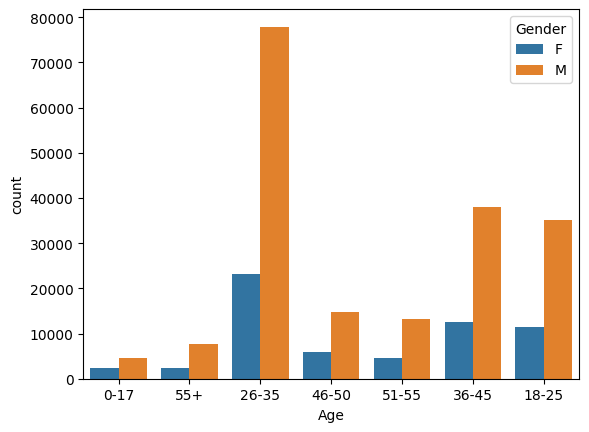

In [43]:
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='count'>

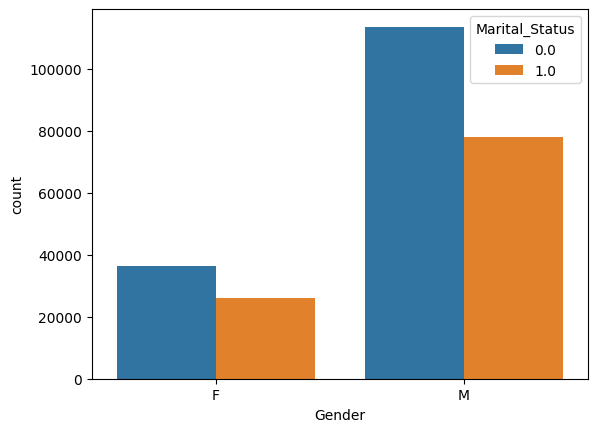

In [44]:
sns.countplot(x='Gender', hue='Marital_Status', data=df)

<Axes: >

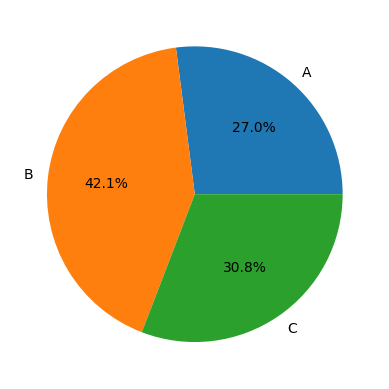

In [45]:
df.groupby('City_Category').size().plot(kind='pie', autopct='%0.1f%%')

<Axes: xlabel='City_Category', ylabel='count'>

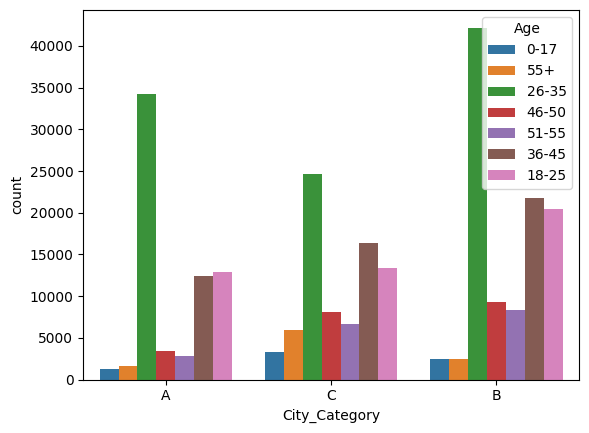

In [46]:
sns.countplot(x='City_Category', hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

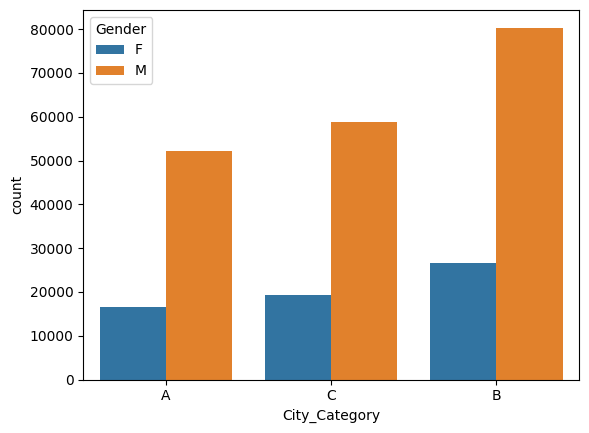

In [47]:
sns.countplot(x='City_Category', hue='Gender',data=df)

<Axes: ylabel='Purchase'>

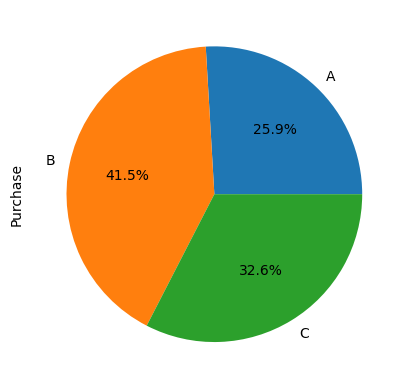

In [48]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct='%0.1f%%')

## Occupation and Products Analysis

In [50]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


<Axes: ylabel='count'>

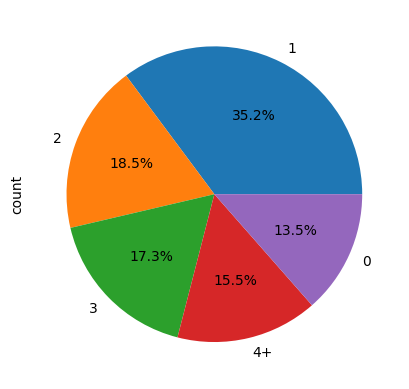

In [51]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [52]:
df['Product_Category_1'].value_counts()

Product_Category_1
5.0     70407
1.0     65169
8.0     53190
11.0    11241
2.0     11141
3.0      9426
6.0      9320
4.0      5503
16.0     4559
15.0     2933
13.0     2544
10.0     2356
12.0     1822
7.0      1727
18.0     1425
14.0      704
17.0      276
9.0       188
Name: count, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

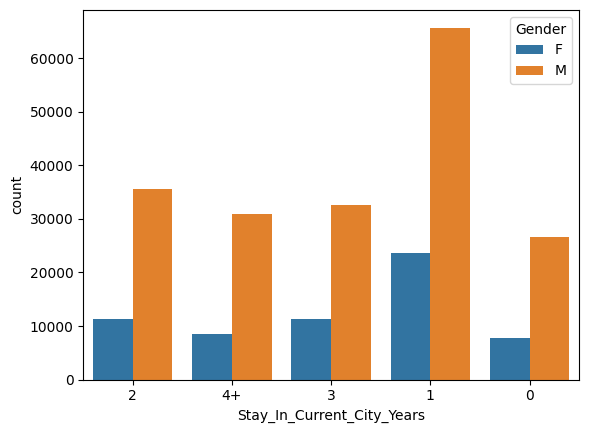

In [53]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Gender', data=df)

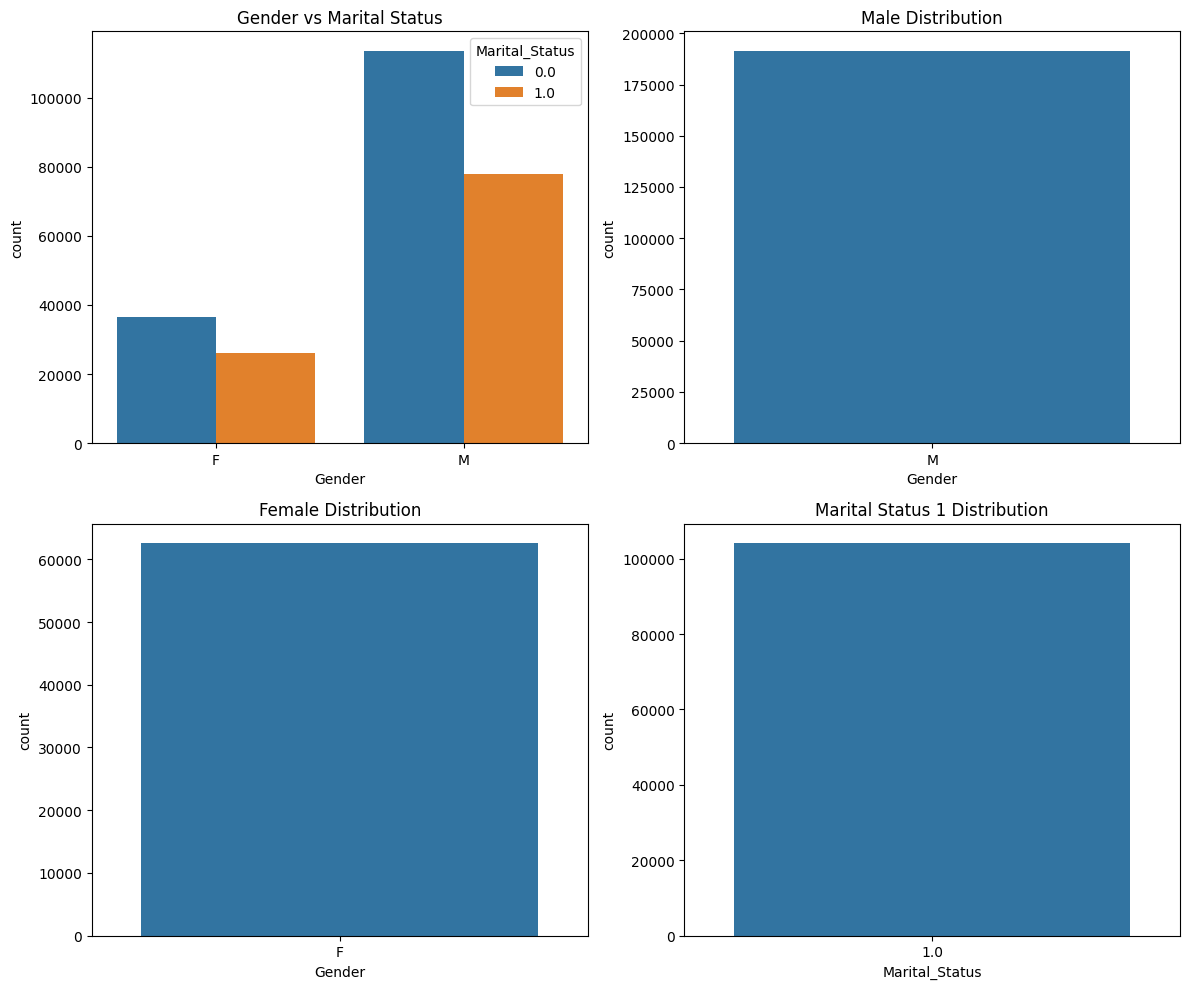

In [55]:
# Assuming 'df' is your DataFrame
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Filter the data
a = df[df['Gender'] == 'M']
b = df[df['Gender'] == 'F']
c = df[df['Marital_Status'] == 0]
d = df[df['Marital_Status'] == 1]

# Plotting
sns.countplot(x='Gender', hue='Marital_Status', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Gender vs Marital Status')

sns.countplot(x='Gender', data=a, ax=axs[0, 1])
axs[0, 1].set_title('Male Distribution')

sns.countplot(x='Gender', data=b, ax=axs[1, 0])
axs[1, 0].set_title('Female Distribution')

sns.countplot(x='Marital_Status', data=d, ax=axs[1, 1])
axs[1, 1].set_title('Marital Status 1 Distribution')

plt.tight_layout()
plt.show()
